# Performance Monitoring

As your computational graphs become more complex, it can be helpful to see which tasks are being executed, and how long it takes.  To demonstrate how to do this, let's start with a simple graph that simulates some long-running tasks:

In [1]:
import graphcat

graph = graphcat.StaticGraph()
graph.set_task("A", graphcat.delay(2))
graph.set_task("B", graphcat.delay(1))
graph.set_task("C", graphcat.delay(0.1))
graph.set_task("D", graphcat.null)
graph.add_links("A", "B")
graph.add_links("B", ["C", "D"])

In [2]:
monitor = graphcat.PerformanceMonitor(graph)

Now, we're ready to execute the graph and visualize the results:

In [3]:
graph.update("C")

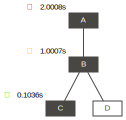

In [4]:
import graphcat.diagram
import graphcat.notebook

agraph = graphcat.diagram.draw(graph, rankdir="TB")
agraph = graphcat.diagram.performance(agraph, monitor)
graphcat.notebook.display(agraph)

In [5]:
monitor.tasks

{'A': [2.0007550716400146],
 'B': [1.0006828308105469],
 'C': [0.10363316535949707]}

Note that the execution times are stored in a list, so you can track multiple times, not just the most recent.  For example, if we force task "C" to execute again:

In [6]:
graph.mark_unfinished("C")
graph.update("C")
monitor.tasks

{'A': [2.0007550716400146],
 'B': [1.0006828308105469],
 'C': [0.10363316535949707, 0.10011696815490723]}

Finally, the monitor can be reset to begin recording times from scratch:

In [7]:
monitor.reset()
graph.mark_unfinished("C")
graph.update("C")
monitor.tasks

{'C': [0.1026008129119873]}